# Research Assignment Code: 
# The MW-M31 Dark Matter Merger Remnant 3D Distribution
### Cassandra Bodin

## My goal is to model the 3D distribution of dark matter within the halos of the Milky Way (MW) and Andromeda (M31) galaxies before, during, and after their merger. Once modeled, I will fit a shape to each dark matter distribution. The possible shapes are a triaxial ellipsoid, an oblate spheroid, or a prolate spheroid.

Triaxial ellipsoid is an ellipsoid where each of the three axes are different lengths ($a \neq b \neq c$). A ellipsoid follows the equation $\frac{x^2}{a^2} +\frac{y^2}{b} +\frac{z^2}{c} =1$

Oblte spheroid is a sphere that has been flatened into a lentil like shape ($c<a$ and $a=b$)
Prolate spheroid is a sphere that has been elongated into a football like shape ($c>a$ and $a=b$)
A spheroid follows the equation $\frac{x^2+y^2}{a^2} +\frac{z^2}{c} =1$

**where a is the semi-major axis, b is the semi-minor axis, and c is the distance from the center to the edge along the line of symmetry

### Import Modules

In [2]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib
from mpl_toolkits import mplot3d 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# my modules
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile

### COM information for Before (b), During (d), and After (a) the Merger

In [3]:
#COM information for before (b) the merger
#Create a COM of object for M31 Halo Using Code from CenterOfMass
COMH_M31_b = CenterOfMass("M31_000.txt",1) #note this is before the merger
#Create a COM of object for MW Halo Using Code from CenterOfMass
COMH_MW_b = CenterOfMass("MW_000.txt",1)#note this is before the merger


# Compute COM of M31 using halo particles
COMP_M31_b = COMH_M31_b.COM_P(0.1)
COMV_M31_b = COMH_M31_b.COM_V(COMP_M31_b[0],COMP_M31_b[1],COMP_M31_b[2])
# Compute COM of MW_b using halo particles
COMP_MW_b = COMH_MW_b.COM_P(0.1)
COMV_MW_b = COMH_MW_b.COM_V(COMP_MW_b[0],COMP_MW_b[1],COMP_MW_b[2])

# Determine positions of halo particles relative to COM 
xH_M31_b = COMH_M31_b.x - COMP_M31_b[0].value 
yH_M31_b = COMH_M31_b.y - COMP_M31_b[1].value 
zH_M31_b = COMH_M31_b.z - COMP_M31_b[2].value 
# Determine positions of halo particles relative to COM 
xH_MW_b = COMH_MW_b.x - COMP_MW_b[0].value 
yH_MW_b = COMH_MW_b.y - COMP_MW_b[1].value 
zH_MW_b = COMH_MW_b.z - COMP_MW_b[2].value 

# total magnitude
rtot_M31_b = np.sqrt(xH_M31_b**2 + yH_M31_b**2 + zH_M31_b**2)
rtot_MW_b = np.sqrt(xH_MW_b**2 + yH_MW_b**2 + zH_MW_b**2)

# Determine velocities of halo particles relatiev to COM motion
vxH_M31_b = COMH_M31_b.vx - COMV_M31_b[0].value 
vyH_M31_b = COMH_M31_b.vy - COMV_M31_b[1].value 
vzH_M31_b = COMH_M31_b.vz - COMV_M31_b[2].value 
vxH_MW_b = COMH_MW_b.vx - COMV_MW_b[0].value 
vyH_MW_b = COMH_MW_b.vy - COMV_MW_b[1].value 
vzH_MW_b = COMH_MW_b.vz - COMV_MW_b[2].value 

# total velocity 
vtot_M31_b = np.sqrt(vxH_M31_b**2 + vyH_M31_b**2 + vzH_M31_b**2)
vtot_MW_b = np.sqrt(vxH_MW_b**2 + vyH_MW_b**2 + vzH_MW_b**2)

# Vectors for r and v 
r_M31_b = np.array([xH_M31_b,yH_M31_b,zH_M31_b]).T # transposed 
v_M31_b = np.array([vxH_M31_b,vyH_M31_b,vzH_M31_b]).T
r_MW_b = np.array([xH_MW_b,yH_MW_b,zH_MW_b]).T  
v_MW_b = np.array([vxH_MW_b,vyH_MW_b,vzH_MW_b]).T

In [4]:
#COM information for during (d) the merger
COMH_M31_d = CenterOfMass("M31_400.txt",1) #note this is during the merger
#COMH_M31_a = CenterOfMass("M31_801.txt",1) #note this is tafter the merger
COMH_MW_d = CenterOfMass("MW_400.txt",1) #note this is during the merger
#COMH_MW_a = CenterOfMass("MW_801.txt",1) #note this is tafter the merger

# DURING
# Compute COM of M31 using halo particles
COMP_M31_d = COMH_M31_d.COM_P(0.1)
COMV_M31_d = COMH_M31_d.COM_V(COMP_M31_d[0],COMP_M31_d[1],COMP_M31_d[2])
# Compute COM of MW_d using halo particles
COMP_MW_d = COMH_MW_d.COM_P(0.1)
COMV_MW_d = COMH_MW_d.COM_V(COMP_MW_d[0],COMP_MW_d[1],COMP_MW_d[2])

# Determine positions of halo particles relative to COM 
xH_M31_d = COMH_M31_d.x - COMP_M31_d[0].value 
yH_M31_d = COMH_M31_d.y - COMP_M31_d[1].value 
zH_M31_d = COMH_M31_d.z - COMP_M31_d[2].value 
# Determine positions of halo particles relative to COM 
xH_MW_d = COMH_MW_d.x - COMP_MW_d[0].value 
yH_MW_d = COMH_MW_d.y - COMP_MW_d[1].value 
zH_MW_d = COMH_MW_d.z - COMP_MW_d[2].value 

# total magnitude
rtot_M31_d = np.sqrt(xH_M31_d**2 + yH_M31_d**2 + zH_M31_d**2)
rtot_MW_d = np.sqrt(xH_MW_d**2 + yH_MW_d**2 + zH_MW_d**2)

# Determine velocities of halo particles relatiev to COM motion
vxH_M31_d = COMH_M31_d.vx - COMV_M31_d[0].value 
vyH_M31_d = COMH_M31_d.vy - COMV_M31_d[1].value 
vzH_M31_d = COMH_M31_d.vz - COMV_M31_d[2].value 
vxH_MW_d = COMH_MW_d.vx - COMV_MW_d[0].value 
vyH_MW_d = COMH_MW_d.vy - COMV_MW_d[1].value 
vzH_MW_d = COMH_MW_d.vz - COMV_MW_d[2].value 

# total velocity 
vtot_M31_d = np.sqrt(vxH_M31_d**2 + vyH_M31_d**2 + vzH_M31_d**2)
vtot_MW_d = np.sqrt(vxH_MW_d**2 + vyH_MW_d**2 + vzH_MW_d**2)

# Vectors for r and v 
r_M31_d = np.array([xH_M31_d,yH_M31_d,zH_M31_d]).T # transposed 
v_M31_d = np.array([vxH_M31_d,vyH_M31_d,vzH_M31_d]).T
r_MW_d = np.array([xH_MW_d,yH_MW_d,zH_MW_d]).T  
v_MW_d = np.array([vxH_MW_d,vyH_MW_d,vzH_MW_d]).T

In [5]:
#COM information for after (a) the merger
COMH_M31_a = CenterOfMass("M31_801.txt",1) #note this is after the merger
COMH_MW_a = CenterOfMass("MW_801.txt",1) #note this is after the merger

# DURING
# Compute COM of M31 using halo particles
COMP_M31_a = COMH_M31_a.COM_P(0.1)
COMV_M31_a = COMH_M31_a.COM_V(COMP_M31_a[0],COMP_M31_a[1],COMP_M31_a[2])
# Compute COM of MW_a using halo particles
COMP_MW_a = COMH_MW_a.COM_P(0.1)
COMV_MW_a = COMH_MW_a.COM_V(COMP_MW_a[0],COMP_MW_a[1],COMP_MW_a[2])

# Determine positions of halo particles relative to COM 
xH_M31_a = COMH_M31_a.x - COMP_M31_a[0].value 
yH_M31_a = COMH_M31_a.y - COMP_M31_a[1].value 
zH_M31_a = COMH_M31_a.z - COMP_M31_a[2].value 
# Determine positions of halo particles relative to COM 
xH_MW_a = COMH_MW_a.x - COMP_MW_a[0].value 
yH_MW_a = COMH_MW_a.y - COMP_MW_a[1].value 
zH_MW_a = COMH_MW_a.z - COMP_MW_a[2].value 

# total magnitude
rtot_M31_a = np.sqrt(xH_M31_a**2 + yH_M31_a**2 + zH_M31_a**2)
rtot_MW_a = np.sqrt(xH_MW_a**2 + yH_MW_a**2 + zH_MW_a**2)

# Determine velocities of halo particles relatiev to COM motion
vxH_M31_a = COMH_M31_a.vx - COMV_M31_a[0].value 
vyH_M31_a = COMH_M31_a.vy - COMV_M31_a[1].value 
vzH_M31_a = COMH_M31_a.vz - COMV_M31_a[2].value 
vxH_MW_a = COMH_MW_a.vx - COMV_MW_a[0].value 
vyH_MW_a = COMH_MW_a.vy - COMV_MW_a[1].value 
vzH_MW_a = COMH_MW_a.vz - COMV_MW_a[2].value 

# total velocity 
vtot_M31_a = np.sqrt(vxH_M31_a**2 + vyH_M31_a**2 + vzH_M31_a**2)
vtot_MW_a = np.sqrt(vxH_MW_a**2 + vyH_MW_a**2 + vzH_MW_a**2)

# Vectors for r and v 
r_M31_a = np.array([xH_M31_a,yH_M31_a,zH_M31_a]).T # transposed 
v_M31_a = np.array([vxH_M31_a,vyH_M31_a,vzH_M31_a]).T
r_MW_a = np.array([xH_MW_a,yH_MW_a,zH_MW_a]).T  
v_MW_a = np.array([vxH_MW_a,vyH_MW_a,vzH_MW_a]).T

## Shapes Code(triaxial ellipsoid, oblate spheroid, and prolate spheroid) 


Triaxial ellipsoid ($a \neq b \neq c$) - An ellipsoid follows the equation $\frac{x^2}{a^2} +\frac{y^2}{b} +\frac{z^2}{c} =1$

Oblte spheroid ($c<a$ and $a=b$)
Prolate spheroid ($c>a$ and $a=b$) -
A spheroid follows the equation $\frac{x^2+y^2}{a^2} +\frac{z^2}{c} =1$

### Use Lab 7 Code to Fine Tune values for norm, a, b, and c

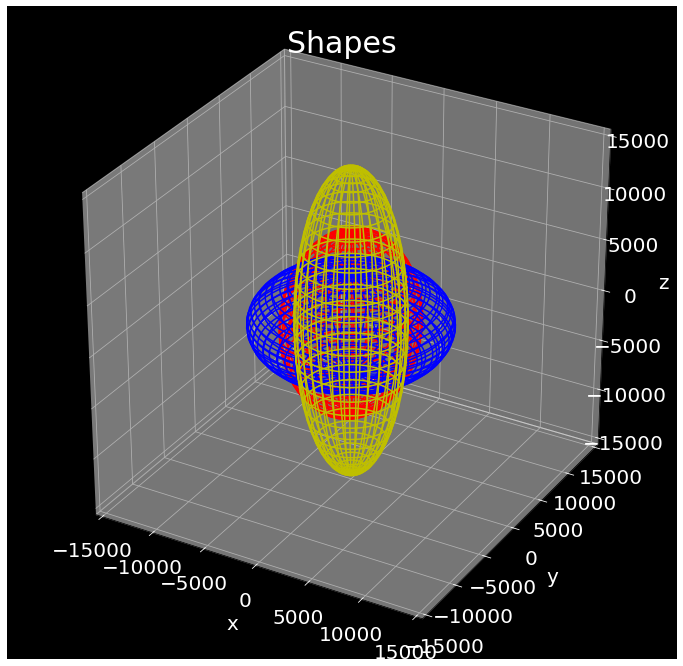

In [99]:
#plot also uses mpl_toolkits.mplot3D
# likely import Axes3D
#from mpl_toolkits3D import Axes3D
#plot using wire frame

fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(projection='3d')
#change the background color to black
ax.set_facecolor('black')

#set up parameters for the shape we're fitting the 3D distribution to
u=np.linspace(0.0, 2.0*np.pi,60)
v=np.linspace(0.0, np.pi,60)

norm= 15000 #normalization parameter

#shape 1 Triaxial ellipsoid
coef1=(7,5,3)
rx1,ry1,rz1=norm/np.sqrt(coef1)
x1= rx1*np.outer(np.cos(u),np.sin(v)) #choose size for x
y1= ry1*np.outer(np.sin(u),np.sin(v)) #choose size for y
z1= rz1*np.outer(np.ones_like(u),np.cos(v)) #choose size for z

#shape 2 Prolate Spheroid
coef2=(10,10,1)
rx2,ry2,rz2=norm/np.sqrt(coef2)
x2= rx2*np.outer(np.cos(u),np.sin(v)) #choose size for x
y2= ry2*np.outer(np.sin(u),np.sin(v)) #choose size for y
z2= rz2*np.outer(np.ones_like(u),np.cos(v)) #choose size for z

#shape 3 Oblate Spheroid
coef3=(3,3,10)
rx3,ry3,rz3=norm/np.sqrt(coef3)
x3= rx3*np.outer(np.cos(u),np.sin(v)) #choose size for x
y3= ry3*np.outer(np.sin(u),np.sin(v)) #choose size for y
z3= rz3*np.outer(np.ones_like(u),np.cos(v)) #choose size for z

#plot the shape
ax.plot_wireframe(x1,y1,z1, color='r')
ax.plot_wireframe(x2,y2,z2, color='y')
ax.plot_wireframe(x3,y3,z3, color='b')

plt.xlim(-norm,norm)
plt.ylim(-norm,norm)

ax.set_title('Shapes', fontsize=30,color='white')
ax.set_xlabel('x',fontsize=20, labelpad=20, color='white')
ax.set_ylabel('y',fontsize=20, labelpad=20, color='white')
ax.set_zlabel('z',fontsize=20, labelpad=20, color='white')
ax.tick_params(axis='both', labelsize=20, pad=10, colors='white')

plt.show()

## 2D Plots- Finding parameters a, b, c

Use Lab 7 code with the disk particles replaced with halo particles. Change the parameters in the plotting to view the distributions in the different planes. x-y plane, y-z plane, x-z plane

### Pre-Merger

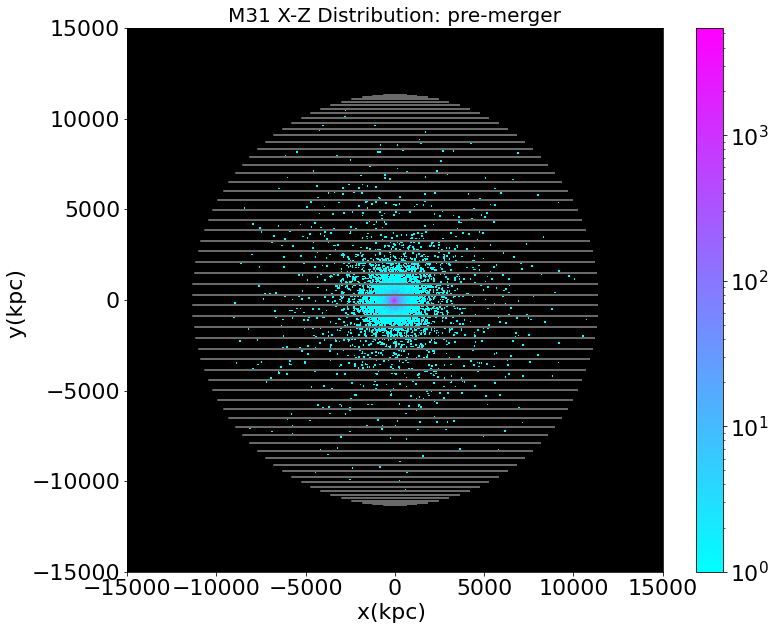

<Figure size 432x288 with 0 Axes>

In [118]:
# M31 Halo 2D Plots -xz
fig, ax= plt.subplots(figsize=(12, 10))

#change the background color to black
ax.set_facecolor('black')

#shape drawing. Note using the same code as to draw in 3D 
#in order to keep the parameters constant for the final 3D plotting
#Note: This is why there are multiple layers plotted 

#set up parameters for the shape we're fitting the 3D distribution to
u=np.linspace(0.0, 2.0*np.pi,60)
v=np.linspace(0.0, np.pi,60)
#shape: Sphere <-- know that initial distribution is spherical a=b=c
coef1=(1.75,1.75,1.75) #,a,b,c
norm= 15000 #normalization parameter
rx1,ry1,rz1=norm/np.sqrt(coef1)
x1= rx1*np.outer(np.cos(u),np.sin(v)) #choose size for x
y1= ry1*np.outer(np.sin(u),np.sin(v)) #choose size for y
z1= rz1*np.outer(np.ones_like(u),np.cos(v)) #choose size for z
ax.plot(x1,z1, color='dimgrey')

# ADD HERE
# plot the particle density for M31 using a 2D historgram
# plt.hist2D(pos1,pos2, bins=, norm=LogNorm), cmap= )
# cmap options: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html  
#   e.g. magma, viridis
# can modify bin number to make the plot smoother

plt.hist2d(xH_M31_b,zH_M31_b, bins=550, norm=LogNorm(), cmap='cool')
plt.colorbar()

# Add axis labels
plt.xlabel('x(kpc) ', fontsize=22)
plt.ylabel('y(kpc) ', fontsize=22)

lim=15000
#set axis limits
plt.ylim(-lim,lim)
plt.xlim(-lim,lim)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
ax.set_title('M31 X-Z Distribution: pre-merger', fontsize=20)



plt.show()

# Save to a file
plt.savefig('XZ_Halo_M31.pdf', rasterized=True, dpi=350)

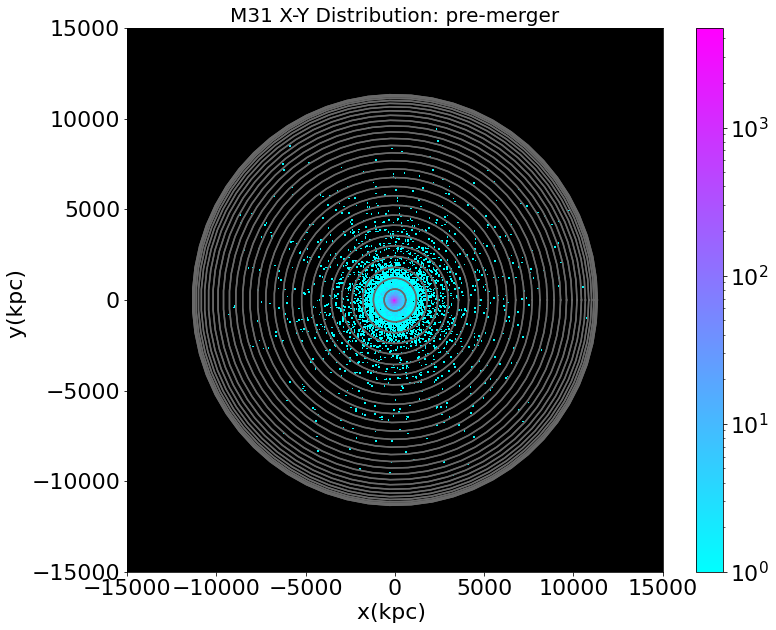

<Figure size 432x288 with 0 Axes>

In [117]:
# M31 Halo 2D Plots -xy
fig, ax= plt.subplots(figsize=(12, 10))

#change the background color to black
ax.set_facecolor('black')

#shape drawing. Note using the same code as to draw in 3D 
#in order to keep the parameters constant for the final 3D plotting
#Note: This is why there are multiple layers plotted 

#shape: Sphere <-- know that initial distribution is spherical a=b=c
coef1=(1.75,1.75,1.75) #,a,b,c
norm= 15000 #normalization parameter
rx1,ry1,rz1=norm/np.sqrt(coef1)
x1= rx1*np.outer(np.cos(u),np.sin(v)) #choose size for x
y1= ry1*np.outer(np.sin(u),np.sin(v)) #choose size for y
z1= rz1*np.outer(np.ones_like(u),np.cos(v)) #choose size for z
ax.plot(x1,y1, color='dimgrey')


# ADD HERE
# plot the particle density for M31 using a 2D historgram
# plt.hist2D(pos1,pos2, bins=, norm=LogNorm), cmap= )
# cmap options: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html  
#   e.g. magma, viridis
# can modify bin number to make the plot smoother

#change the background color to black
ax.set_facecolor('black')

plt.hist2d(xH_M31_b,yH_M31_b, bins=550, norm=LogNorm(), cmap='cool')
plt.colorbar()

# Add axis labels
plt.xlabel('x(kpc) ', fontsize=22)
plt.ylabel('y(kpc) ', fontsize=22)

lim=15000
#set axis limits
plt.ylim(-lim,lim)
plt.xlim(-lim,lim)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

ax.set_title('M31 X-Y Distribution: pre-merger', fontsize=20)

#set up parameters for the shape we're fitting the 3D distribution to
u=np.linspace(0.0, 2.0*np.pi,60)
v=np.linspace(0.0, np.pi,60)


plt.show()

# Save to a file
plt.savefig('XY_Halo_M31.pdf', rasterized=True, dpi=350)

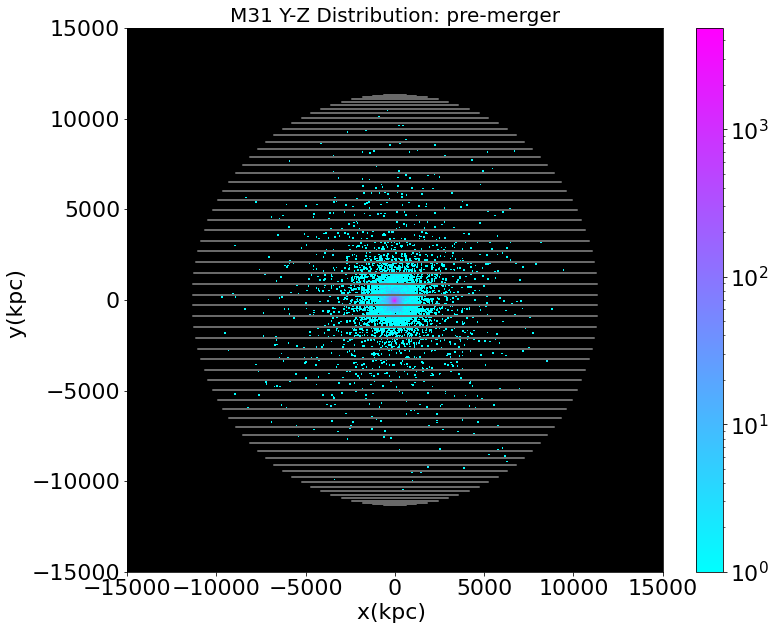

<Figure size 432x288 with 0 Axes>

In [116]:
# M31 Halo 2D Plots -yz
fig, ax= plt.subplots(figsize=(12, 10))

#change the background color to black
ax.set_facecolor('black')

#shape drawing. Note using the same code as to draw in 3D 
#in order to keep the parameters constant for the final 3D plotting
#Note: This is why there are multiple layers plotted 

#shape: Sphere <-- know that initial distribution is spherical a=b=c
coef1=(1.75,1.75,1.75) #,a,b,c
norm= 15000 #normalization parameter
rx1,ry1,rz1=norm/np.sqrt(coef1)
x1= rx1*np.outer(np.cos(u),np.sin(v)) #choose size for x
y1= ry1*np.outer(np.sin(u),np.sin(v)) #choose size for y
z1= rz1*np.outer(np.ones_like(u),np.cos(v)) #choose size for z
ax.plot(y1,z1, color='dimgrey')

# ADD HERE
# plot the particle density for M31 using a 2D historgram
# plt.hist2D(pos1,pos2, bins=, norm=LogNorm), cmap= )
# cmap options: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html  
#   e.g. magma, viridis
# can modify bin number to make the plot smoother

#change the background color to black
ax.set_facecolor('black')

plt.hist2d(yH_M31_b,zH_M31_b, bins=550, norm=LogNorm(), cmap='cool')
plt.colorbar()

# Add axis labels
plt.xlabel('x(kpc) ', fontsize=22)
plt.ylabel('y(kpc) ', fontsize=22)

lim=15000
#set axis limits
plt.ylim(-lim,lim)
plt.xlim(-lim,lim)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

ax.set_title('M31 Y-Z Distribution: pre-merger', fontsize=20)

#set up parameters for the shape we're fitting the 3D distribution to
u=np.linspace(0.0, 2.0*np.pi,60)
v=np.linspace(0.0, np.pi,60)


plt.show()

# Save to a file
plt.savefig('YZ_Halo_M31.pdf', rasterized=True, dpi=350)

### Post Merger

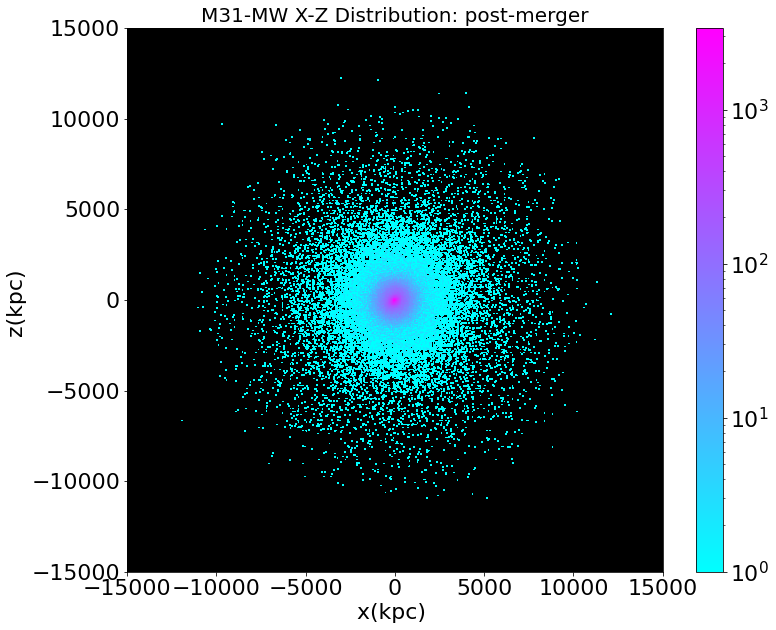

<Figure size 432x288 with 0 Axes>

In [131]:
# M31 Halo 2D Plots -xz
fig, ax= plt.subplots(figsize=(12, 10))

#change the background color to black
ax.set_facecolor('black')

#shape drawing. Note using the same code as to draw in 3D 
#in order to keep the parameters constant for the final 3D plotting
#Note: This is why there are multiple layers plotted 



# ADD HERE
# plot the particle density for M31 using a 2D historgram
# plt.hist2D(pos1,pos2, bins=, norm=LogNorm), cmap= )
# cmap options: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html  
#   e.g. magma, viridis
# can modify bin number to make the plot smoother

xtot_a = xH_M31_a + xH_MW_a
ztot_a = zH_M31_a + zH_MW_a

plt.hist2d(xtot_a,ztot_a, bins=550, norm=LogNorm(), cmap='cool')
plt.colorbar()

# Add axis labels
plt.xlabel('x(kpc) ', fontsize=22)
plt.ylabel('z(kpc) ', fontsize=22)

lim=15000
#set axis limits
plt.ylim(-lim,lim)
plt.xlim(-lim,lim)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
ax.set_title('M31-MW X-Z Distribution: post-merger', fontsize=20)



plt.show()

# Save to a file
plt.savefig('XZ_Halo_AM.pdf', rasterized=True, dpi=350)

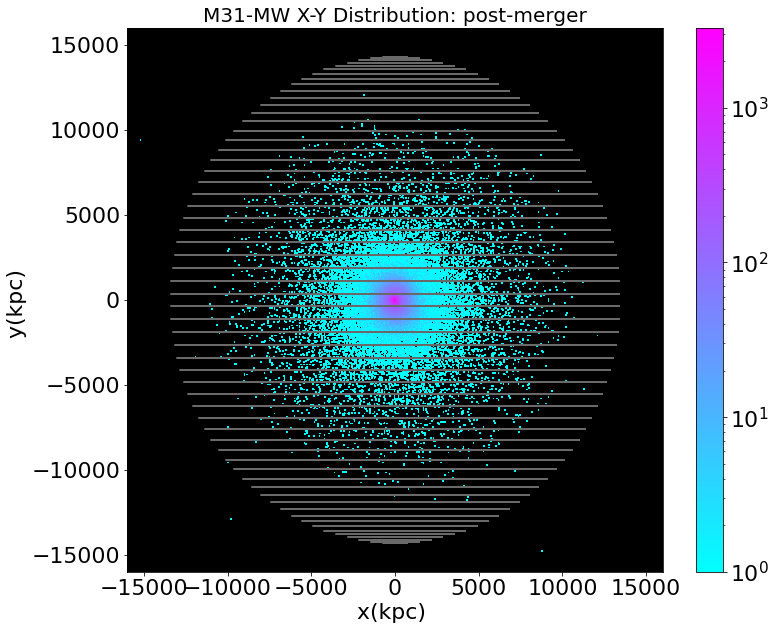

<Figure size 432x288 with 0 Axes>

In [132]:
# M31 Halo 2D Plots -xz
fig, ax= plt.subplots(figsize=(12, 10))

#change the background color to black
ax.set_facecolor('black')

#shape drawing. Note using the same code as to draw in 3D 
#in order to keep the parameters constant for the final 3D plotting
#Note: This is why there are multiple layers plotted 

#set up parameters for the shape we're fitting the 3D distribution to
u=np.linspace(0.0, 2.0*np.pi,60)
v=np.linspace(0.0, np.pi,60)
#shape: Sphere <-- know that initial distribution is spherical a=b=c
coef1=(1.25,1,1.1) #,a,b,c
norm= 15000 #normalization parameter
rx1,ry1,rz1=norm/np.sqrt(coef1)
x1= rx1*np.outer(np.cos(u),np.sin(v)) #choose size for x
y1= ry1*np.outer(np.sin(u),np.sin(v)) #choose size for y
z1= rz1*np.outer(np.ones_like(u),np.cos(v)) #choose size for z
ax.plot(x1,z1, color='dimgrey')

# ADD HERE
# plot the particle density for M31 using a 2D historgram
# plt.hist2D(pos1,pos2, bins=, norm=LogNorm), cmap= )
# cmap options: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html  
#   e.g. magma, viridis
# can modify bin number to make the plot smoother

xtot_a = xH_M31_a + xH_MW_a
ytot_a = yH_M31_a + yH_MW_a

plt.hist2d(xtot_a,ytot_a, bins=550, norm=LogNorm(), cmap='cool')
plt.colorbar()

# Add axis labels
plt.xlabel('x(kpc) ', fontsize=22)
plt.ylabel('y(kpc) ', fontsize=22)

lim=16000
#set axis limits
plt.ylim(-lim,lim)
plt.xlim(-lim,lim)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
ax.set_title('M31-MW X-Y Distribution: post-merger', fontsize=20)



plt.show()

# Save to a file
plt.savefig('XY_Halo_AM.pdf', rasterized=True, dpi=350)

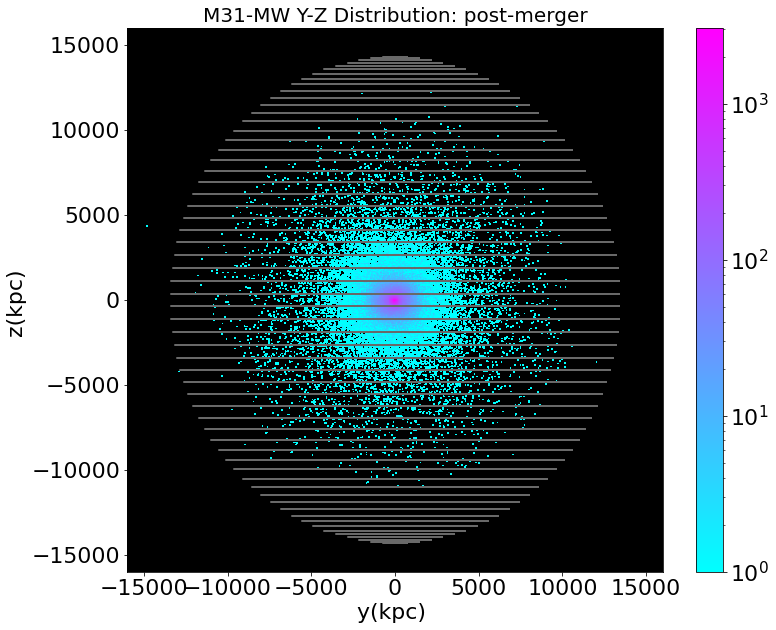

<Figure size 432x288 with 0 Axes>

In [133]:
# M31 Halo 2D Plots -xz
fig, ax= plt.subplots(figsize=(12, 10))

#change the background color to black
ax.set_facecolor('black')

#shape drawing. Note using the same code as to draw in 3D 
#in order to keep the parameters constant for the final 3D plotting
#Note: This is why there are multiple layers plotted 

#set up parameters for the shape we're fitting the 3D distribution to
u=np.linspace(0.0, 2.0*np.pi,60)
v=np.linspace(0.0, np.pi,60)
#shape: Sphere <-- know that initial distribution is spherical a=b=c
coef1=(1.25,1,1.1) #,a,b,c
norm= 15000 #normalization parameter
rx1,ry1,rz1=norm/np.sqrt(coef1)
x1= rx1*np.outer(np.cos(u),np.sin(v)) #choose size for x
y1= ry1*np.outer(np.sin(u),np.sin(v)) #choose size for y
z1= rz1*np.outer(np.ones_like(u),np.cos(v)) #choose size for z
ax.plot(x1,z1, color='dimgrey')

# ADD HERE
# plot the particle density for M31 using a 2D historgram
# plt.hist2D(pos1,pos2, bins=, norm=LogNorm), cmap= )
# cmap options: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html  
#   e.g. magma, viridis
# can modify bin number to make the plot smoother

ztot_a = zH_M31_a + zH_MW_a
ytot_a = yH_M31_a + yH_MW_a

plt.hist2d(ytot_a,ztot_a, bins=550, norm=LogNorm(), cmap='cool')
plt.colorbar()

# Add axis labels
plt.xlabel('y(kpc) ', fontsize=22)
plt.ylabel('z(kpc) ', fontsize=22)

lim=16000
#set axis limits
plt.ylim(-lim,lim)
plt.xlim(-lim,lim)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
ax.set_title('M31-MW Y-Z Distribution: post-merger', fontsize=20)



plt.show()

# Save to a file
plt.savefig('YZ_Halo_AM.pdf', rasterized=True, dpi=350)

### Plotting 3D Distributions

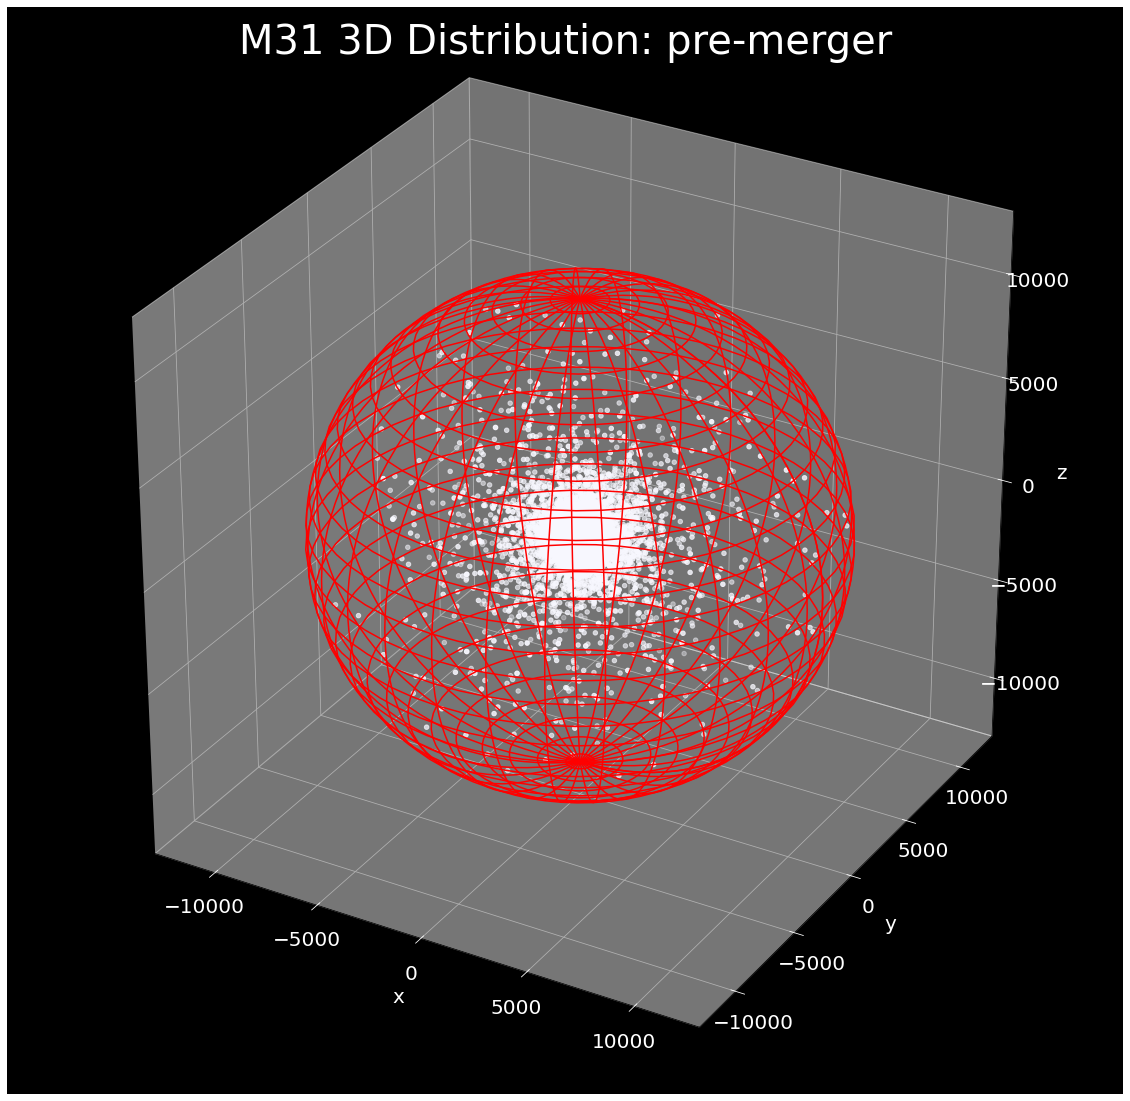

In [129]:
#Plotting the 3D scatter plot (code found on https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)
#uses mpl_toolkits.mplot3D
#makes a 3D plot of object


#Use the M31_000.txt file first to test the plotting
#Shape of both halos should be assumed to be roughly spheroidal before the merger. 
#If this works then move onto other files.

fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(projection='3d')

#change the background color to black
ax.set_facecolor('black')

ax.scatter(xH_M31_b,yH_M31_b,zH_M31_b, color='ghostwhite')

ax.set_title('M31 3D Distribution: pre-merger', fontsize=40, color='white', pad=40)
ax.set_xlabel('x',fontsize=20, labelpad=20, color='white')
ax.set_ylabel('y',fontsize=20, labelpad=20, color='white')
ax.set_zlabel('z',fontsize=20, labelpad=20, color='white')
ax.tick_params(axis='both', labelsize=20, pad=10, colors='white')

#shape: Sphere <-- know that initial distribution is spherical a=b=c
coef1=(1.75,1.75,1.75) #,a,b,c
norm= 15000 #normalization parameter
rx1,ry1,rz1=norm/np.sqrt(coef1)
x1= rx1*np.outer(np.cos(u),np.sin(v)) #choose size for x
y1= ry1*np.outer(np.sin(u),np.sin(v)) #choose size for y
z1= rz1*np.outer(np.ones_like(u),np.cos(v)) #choose size for z

ax.plot_wireframe(x1,y1,z1, color='r')

#ax.view_init(60,35) # changes the view to 60 degrees above the xy plane and rotated 35 degrees counter clockwise acout z axis
plt.savefig('M31_bmerge.png')
plt.show()

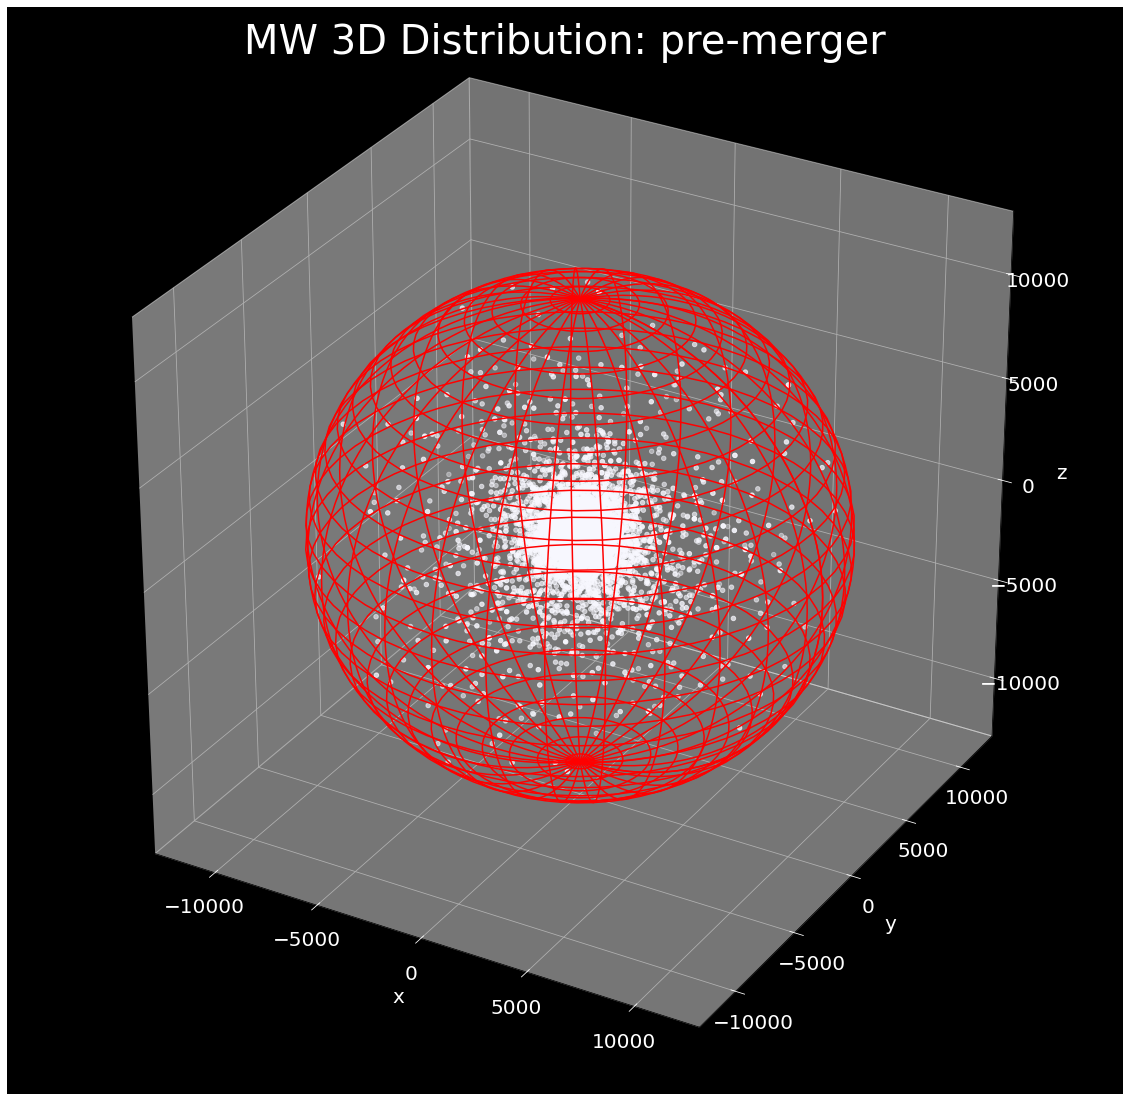

In [130]:
#Plotting the 3D scatter plot (code found on https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)
#uses mpl_toolkits.mplot3D
#makes a 3D plot of object


#Use the MW_000.txt file first to test the plotting
#Shape of both halos should be assumed to be roughly spheroidal before the merger. 
#If this works then move onto other files.

fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(projection='3d')

#shape: Sphere <-- know that initial distribution is spherical a=b=c
coef1=(1.75,1.75,1.75) #,a,b,c
norm= 15000 #normalization parameter
rx1,ry1,rz1=norm/np.sqrt(coef1)
x1= rx1*np.outer(np.cos(u),np.sin(v)) #choose size for x
y1= ry1*np.outer(np.sin(u),np.sin(v)) #choose size for y
z1= rz1*np.outer(np.ones_like(u),np.cos(v)) #choose size for z

ax.plot_wireframe(x1,y1,z1, color='r')

#change the background color to black
ax.set_facecolor('black')

ax.scatter(xH_MW_b,yH_MW_b,zH_MW_b, color='ghostwhite')

ax.set_title('MW 3D Distribution: pre-merger', fontsize=40, color='white', pad=40)
ax.set_xlabel('x',fontsize=20, labelpad=20, color='white')
ax.set_ylabel('y',fontsize=20, labelpad=20, color='white')
ax.set_zlabel('z',fontsize=20, labelpad=20, color='white')
ax.tick_params(axis='both', labelsize=20, pad=10, colors='white')

#ax.view_init(60,35) # changes the view to 60 degrees above the xy plane and rotated 35 degrees counter clockwise acout z axis
plt.savefig('MW_bmerge.png')
plt.show()

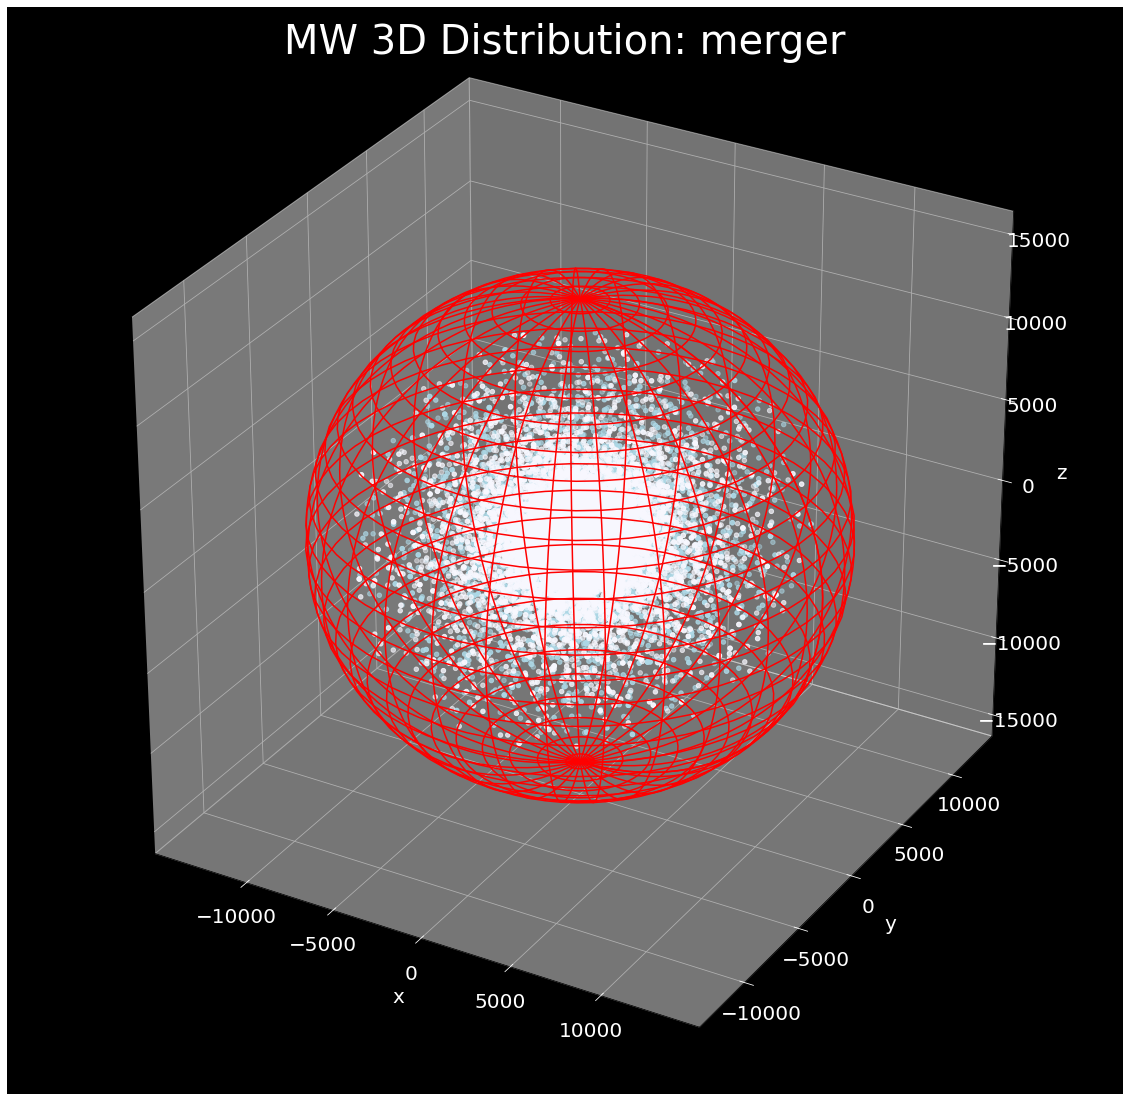

In [128]:
#Plotting the 3D scatter plot (code found on https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)
#uses mpl_toolkits.mplot3D
#makes a 3D plot of object


#During the Merger
#Shape of both halos should be assumed to be roughly spheroidal before the merger. 
#If this works then move onto other files.

fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(projection='3d')

#change the background color to black
ax.set_facecolor('black')

#set up parameters for the shape we're fitting the 3D distribution to
u=np.linspace(0.0, 2.0*np.pi,60)
v=np.linspace(0.0, np.pi,60)
#shape: Sphere <-- know that initial distribution is spherical a=b=c
coef1=(1.25,1.5,1.1) #,a,b,c
norm= 15000 #normalization parameter
rx1,ry1,rz1=norm/np.sqrt(coef1)
x1= rx1*np.outer(np.cos(u),np.sin(v)) #choose size for x
y1= ry1*np.outer(np.sin(u),np.sin(v)) #choose size for y
z1= rz1*np.outer(np.ones_like(u),np.cos(v)) #choose size for z

ax.plot_wireframe(x1,y1,z1, color='r')

ax.scatter(xH_MW_d,yH_MW_d,zH_MW_d, color='ghostwhite')
ax.scatter(xH_M31_d,yH_M31_d,zH_M31_d, color='lightblue')

ax.set_title('MW 3D Distribution: merger', fontsize=40, color='white', pad=40)
ax.set_xlabel('x',fontsize=20, labelpad=20, color='white')
ax.set_ylabel('y',fontsize=20, labelpad=20, color='white')
ax.set_zlabel('z',fontsize=20, labelpad=20, color='white')
ax.tick_params(axis='both', labelsize=20, pad=10, colors='white')

#ax.view_init(60,35) # changes the view to 60 degrees above the xy plane and rotated 35 degrees counter clockwise acout z axis
plt.savefig('M31MW_dmerge.png')
plt.show()

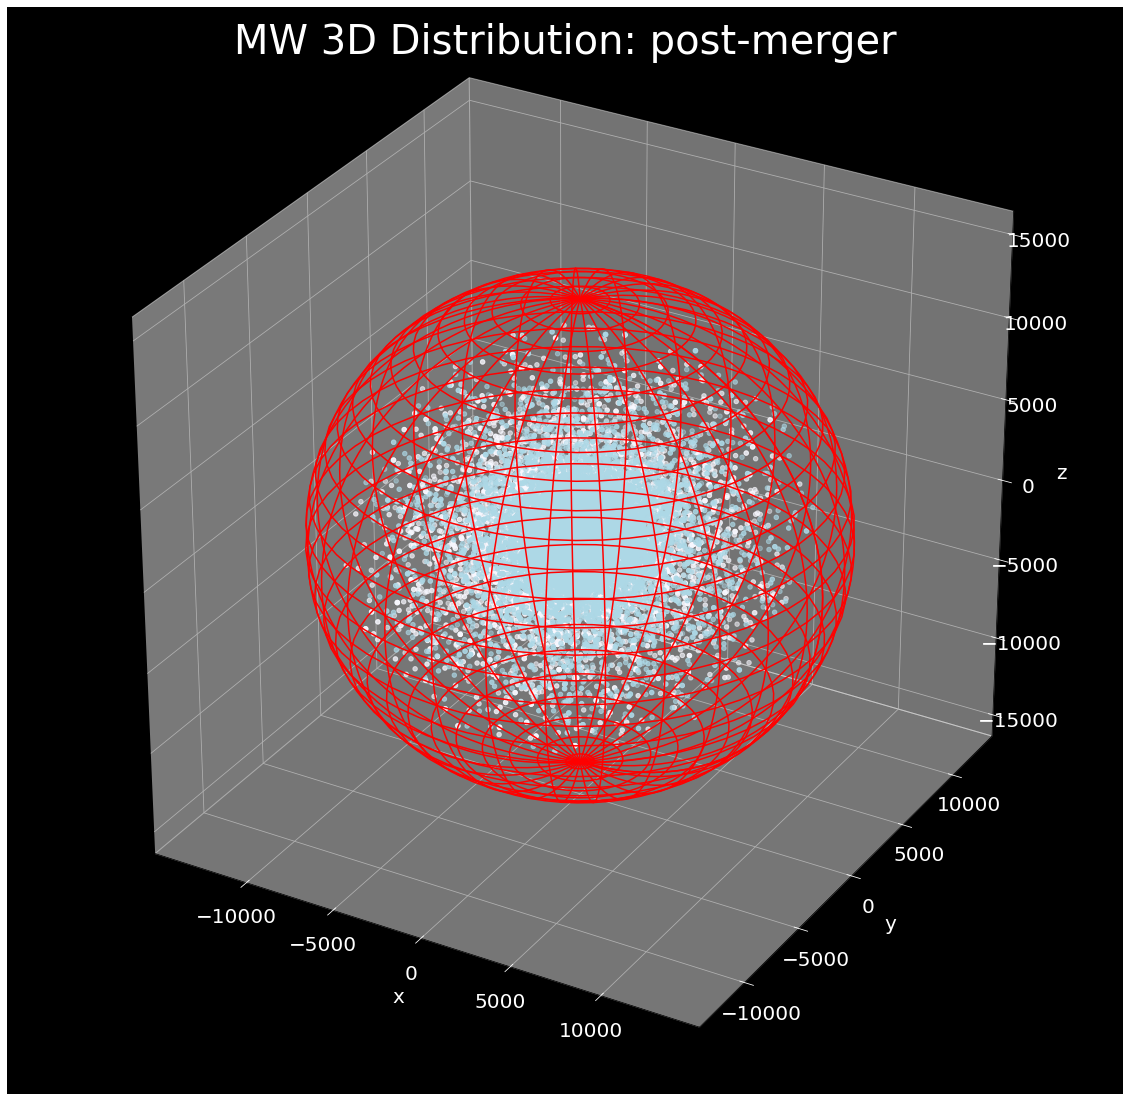

In [127]:
#After the Merger

#Plotting the 3D scatter plot (code found on https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)
#uses mpl_toolkits.mplot3D
#makes a 3D plot of object

fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(projection='3d')

#change the background color to black
ax.set_facecolor('black')

#set up parameters for the shape we're fitting the 3D distribution to
u=np.linspace(0.0, 2.0*np.pi,60)
v=np.linspace(0.0, np.pi,60)
#shape: Sphere <-- know that initial distribution is spherical a=b=c
coef1=(1.25,1.5,1.1) #,a,b,c
norm= 15000 #normalization parameter
rx1,ry1,rz1=norm/np.sqrt(coef1)
x1= rx1*np.outer(np.cos(u),np.sin(v)) #choose size for x
y1= ry1*np.outer(np.sin(u),np.sin(v)) #choose size for y
z1= rz1*np.outer(np.ones_like(u),np.cos(v)) #choose size for z

ax.plot_wireframe(x1,y1,z1, color='r')

ax.scatter(xH_MW_a,yH_MW_a,zH_MW_a, color='ghostwhite')
ax.scatter(xH_M31_a,yH_M31_a,zH_M31_a, color='lightblue')

ax.set_title('MW 3D Distribution: post-merger', fontsize=40, color='white', pad=40)
ax.set_xlabel('x',fontsize=20, labelpad=20, color='white')
ax.set_ylabel('y',fontsize=20, labelpad=20, color='white')
ax.set_zlabel('z',fontsize=20, labelpad=20, color='white')
ax.tick_params(axis='both', labelsize=20, pad=10, colors='white')

#ax.view_init(60,35) # changes the view to 60 degrees above the xy plane and rotated 35 degrees counter clockwise acout z axis
plt.savefig('M31MW_amerge.png')
plt.show()